# Two Clusters

### Generate 2 clusters 
copy the data from 1 cluster one-Class SVM

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

In [45]:
np.random.seed(33)
samples = 100
# generate cluster of points with outliers
# data1 = np.zeros((out,2))
data1 = 0.5*np.random.randn(samples, 2)+1.5
data2 = 0.5*np.random.randn(samples, 2)-1.5

data = np.zeros((samples,2))
data = np.r_[data1,data2]  # concatenate row wise
data.shape

(200, 2)

(-4, 4)

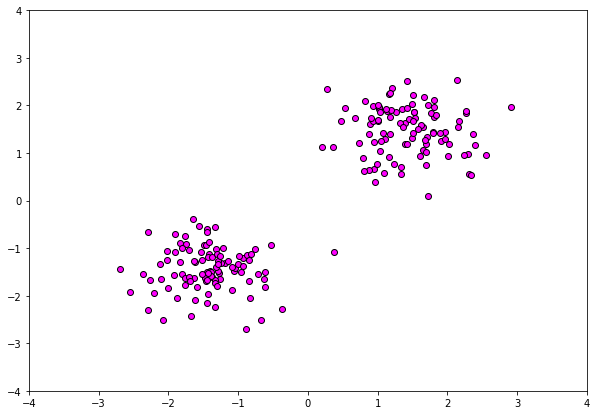

In [53]:
fig, ax = plt.subplots(figsize=(10,7))

plt.scatter(data[:,0],data[:,1], color='magenta', edgecolors = 'black')
ax.set_ylim([-4,4])
ax.set_xlim([-4,4])

In [55]:
# let us plot the showcase of the SVM model
def plot_observation(model, ax):
    # generate a grid
    xx, yy = np.meshgrid(np.linspace(-4,4,samples),np.linspace(-4,4, samples))
    
    # Decision Function 
    # Evaluates the decision function for the samples in X.
    # np.c_ => is used to concatinate along second axis
    z = model.decision_function(np.c_[xx.ravel(),yy.ravel()])
    z = z.reshape(xx.shape)
    
    ax = plt.contour(xx, yy, z,cmap=plt.cm.PuBu)
    
    ax = plt.scatter(model.support_vectors_[:,0], model.support_vectors_[:,1],
                     s=150,linewidth=1, facecolors='none', edgecolors='black')

## Model

In [75]:
nu = 0.06

model = svm.OneClassSVM(nu=nu, kernel='rbf', gamma = 0.5)

model.fit(data)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.5, kernel='rbf',
            max_iter=-1, nu=0.06, shrinking=True, tol=0.001, verbose=False)

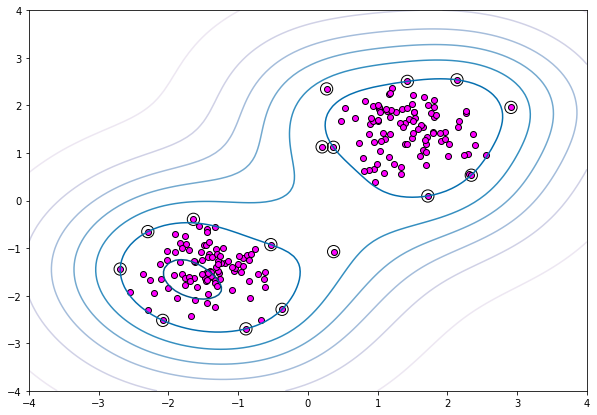

In [76]:
fig, ax = plt.subplots(figsize=(10,7))

plot_observation(model, ax)

plt.scatter(data[:,0],data[:,1], color='magenta', edgecolors = 'black')


# bringing clustrs close
After bringing clusters near, we have to increase gamma and reduce $\nu$, but it increases errors

(-4, 4)

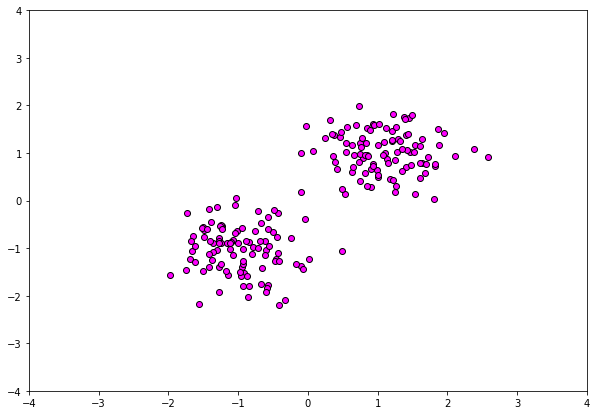

In [79]:
data1 = 0.5*np.random.randn(samples, 2)+1
data2 = 0.5*np.random.randn(samples, 2)-1

data = np.zeros((samples,2))
data = np.r_[data1,data2]  # concatenate row wise

fig, ax = plt.subplots(figsize=(10,7))

plt.scatter(data[:,0],data[:,1], color='magenta', edgecolors = 'black')
ax.set_ylim([-4,4])
ax.set_xlim([-4,4])

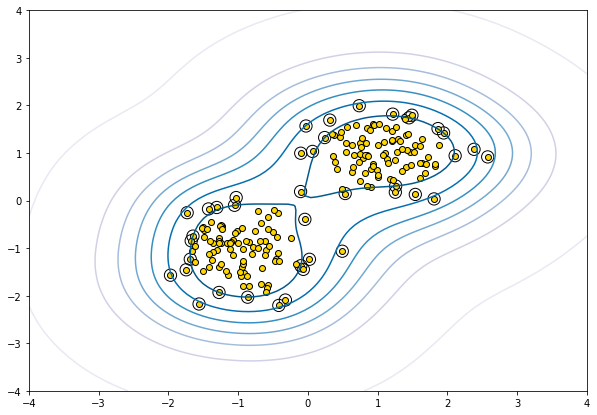

In [96]:
nu = 0.17

model = svm.OneClassSVM(nu=nu, kernel='rbf', gamma = 0.88)

model.fit(data)

fig, ax = plt.subplots(figsize=(10,7))

plot_observation(model, ax)

plt.scatter(data[:,0],data[:,1], color='gold', edgecolors = 'black')